In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
from sklearn import metrics 
from math import sqrt
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import svm
clf = svm.SVC()
A = pd.read_csv("log2.csv")
A=A.sort_values(by=['Action'])
X = A.values[:,[0,1,2,3,5,6,7,8,9,10,11]]
Y = A.values[:,4]
X, Xt, Y, Yt = train_test_split(X, Y, train_size=0.7, random_state=1)

In [ ]:
param_grid=[
  {
      'kernel':['linear', 'poly', 'rbf', 'sigmoid'],

  }
]
cv = GridSearchCV(clf, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy')
cv.fit(X,Y)
print(cv.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=8.
  UserWarning,


In [ ]:
param_grid=[
  {

      'gamma':['scale','auto'],
  }
]
cv1 = GridSearchCV(clf, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy')
cv1.fit(X,Y)
print(cv1.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


{'gamma': 'auto'}


In [ ]:
param_grid=[
  {

      'C':['default', 0.1, 10, 100],
  }
]
cv2 = GridSearchCV(clf, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy')
cv2.fit(X,Y)
print(cv2.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


{'C': 10}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 6

In [ ]:
sv = svm.SVC(kernel= 'linear',C=10, gamma='auto')
sv.fit(X,Y)

SVC(C=10, gamma='auto', kernel='linear')

In [ ]:
ypred = sv.predict(Xt)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['allow', 'deny', 'drop','reset-both']
print(classification_report(Yt, ypred, target_names=target_names,digits=5))



              precision    recall  f1-score   support

       allow    0.99254   0.99193   0.99223     36906
        deny    0.98720   0.95634   0.97153     14682
        drop    0.96119   1.00000   0.98021     12582
  reset-both    0.00000   0.00000   0.00000        52

    accuracy                        0.98457     64222
   macro avg    0.73523   0.73707   0.73599     64222
weighted avg    0.98438   0.98457   0.98434     64222



In [ ]:
import seaborn as sns


def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel("Mean_test_score")
    ax.legend(title=param_z)
    return fig

def plot_cv_result(cv_results, param_x, metric='mean_test_score'):
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x,  y=metric, hue=None, data=cv_results, ci=99, n_boot=64, ax=ax, fontsize=50)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x, fontsize=20)
    ax.set_ylabel("Mean_test_score", fontsize=20)
    
   
    return fig

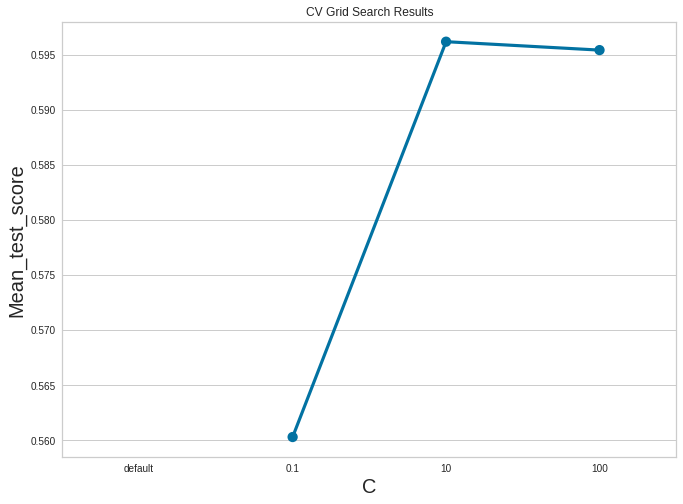

In [ ]:
fig = plot_cv_result(cv2.cv_results_, 'C')

In [ ]:
sv.support_vectors_.shape

(51, 11)

In [ ]:
B = A
B.drop(['Action'], axis='columns', inplace=True)

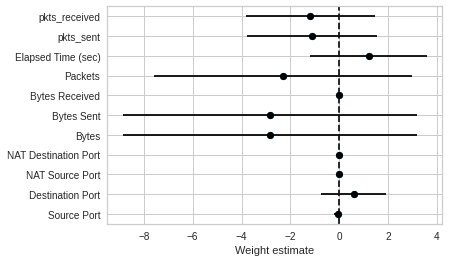

In [ ]:
import numpy as np
features = [[],[],[],[],[],[],[],[],[],[],[]]
for i in range(sv.coef_.shape[0]):
  for j in range(len(sv.coef_[i])):
      features[j].append(sv.coef_[i][j])

means = []
errors = []
for i in features:
  a = np.array(i)
  means.append(np.mean(a))
  errors.append(np.std(a))
  
plt.scatter(means,B.columns)
plt.errorbar(means, B.columns, xerr = errors,fmt = 'o',color='black', capsize=3)
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Weight estimate')
plt.show()
